In [1]:
from urllib.request import urlopen
from PIL import Image
url = 'https://upload.wikimedia.org/wikipedia/commons/a/a1/Tragedy_and_Comedy_%288094737104%29.jpg'
img = Image.open(urlopen(url))
sizes = 500, 500
img.thumbnail(sizes)

## The Evolution of the Five-Act Verse Comedy vs. Tragedy

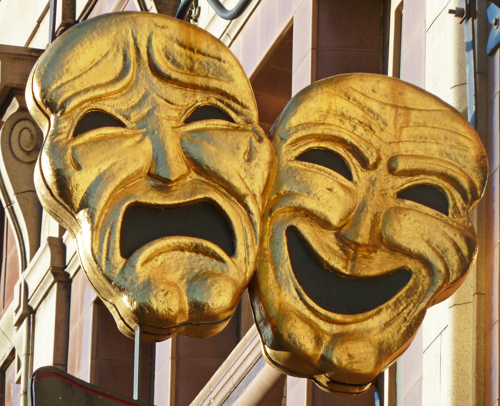

In [2]:
img

In this analysis, we will explore the following questions:
1. We will compare our data on the evolution of the French five-act comedy in verse with Boris Iarho's previous findings on the evolution of the five-act tragedy in verse using the following features:
    - The number of dramatic characters
    - The mobility coefficient
    - The standard range of the number of speaking characters
    - The percentage of non-dialogues
    - The percentage of polylogues
    - The percentage of monologues.


2. We will compare speech distribution in the comedy and tragedy of each period. 
3. Finally, we will explore speech distribution in the comedies and tragedies of individual authors (e.g., Pierre Corneille, Voltaire, Delavigne). The choice of these authors is prompted by Iarkho's article and the data on individual authors that he includes.

## Import Libraries and Define Funtions

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [4]:
# update the boundaries as we determined based on our hypothesis testing
def determine_period(row):
    if row <= 1695:
        period = 1
    elif row >= 1696 and row <= 1795:
        period = 2
    else:
        period = 3
    
    return period

In [5]:
def make_list(row):
    speech_dist = []
    for value in row[1:-1].split('\n '):
        speech_dist.append([int(num) for num in re.findall('[0-9]+', value)])
        
    return speech_dist

In [6]:
def speech_distribution_by_period(period_df):
    all_distributions = []
    for row in period_df['speech_distribution']:
        speech_dist_df = pd.DataFrame(row).T
        # rename columns to make sure they start with 1 and not 0
        speech_dist_df.columns = speech_dist_df.iloc[0, :]
        # no need to include the variants as a row - they will be column names
        only_counts_df = pd.DataFrame(speech_dist_df.iloc[1, :])
        only_counts_df.columns = ['raw_numbers']
        only_counts_df['percentage'] = only_counts_df['raw_numbers'] / only_counts_df.sum().values[0]
        all_distributions.append(round(only_counts_df['percentage'], 4))
        
    period_df_dist = pd.concat(all_distributions, axis=1).fillna(0)
    # take the mean for each period
    mean_per_type = pd.DataFrame(period_df_dist.mean(axis=1)).T 
    mean_per_type = (mean_per_type * 100).round(2)
    mean_per_type.index = ['percentage_of_scenes']
    mean_per_type.index.name = 'number_of_speakers'
    
    return mean_per_type

In [7]:
def sigma_iarkho(variants, weights):
    """
    The function allows calculating standard range following iarkho's procedure.
    Parameters:
        variants - a list with distinct variants in the ascending order, e.g. [1, 2, 3, 4, 5]
        weights - a list of weights corresponding to these variants, e.g. [20, 32, 18, 9, 1]
    Returns:
        sigma - standard range per iarkho
    """
    weighted_mean_variants = np.average(variants, weights=weights)
    differences_squared = [(variant - weighted_mean_variants)**2 for variant in variants]
    weighted_mean_difference = np.average(differences_squared, weights=weights)
    sigma = weighted_mean_difference**0.5

    return sigma

## Part 1. The Evolution of Tragedy vs. Comedy

In this analysis, we will compare our results with Iarkho's findings on the evolution of the five-act tragedy in verse. 
Iarkho distinguished five periods, one of which (Extreme Romanticism) was represented exclusively by German tragedies. His periodization included:

   - Early Neoclassicism (Barocco-influenced early Corneille from 1630 to 1653)
   - Mature Neoclassicism (the seventeenth century)
   - Late Neoclassicism (the eighteenth century)
   - (German) Extreme Romanticism
   - Moderate Romanticism

### Obtain Additional Data From Iarkho's Article

In our previous analyses, we concluded that the percentage of non-dialogues combines two features (the percentage of monologues and the percentage of polylogues) that have divergent evolutionary trends. We used these two features as the basis for our periodization of the French comedy. While the values of these features are not given directly in Iarkho's article, we can calculate them based on the data that he gives.

#### The Percentage of Polylogues

In [8]:
# we can calculate this value from Iarkho's table VIIa (Iarkho 2006, 568)
percentage_polylogues_corneille_one = round(100 - (57.9 + 13.2), 2)
print('The percentage of polylogues in Early Corneille:', percentage_polylogues_corneille_one)

The percentage of polylogues in Early Corneille: 28.9


In [9]:
# we can calculate this value from Iarkho's table IV(Iarkho 2006, 564)
percentage_polylogues_17th = round(100 - (9.6 + 73.7), 2)
print('The percentage of polylogues in Mature Neoclassicism:', percentage_polylogues_17th)

The percentage of polylogues in Mature Neoclassicism: 16.7


In [10]:
# we can calculate this value from Iarkho's table VII (Iarkho 2006, 567)
percentage_polylogues_18th = round(100 - (20.8 + 55.2), 2)
print('The percentage of polylogues in Late Neoclassicism:', percentage_polylogues_18th)

The percentage of polylogues in Late Neoclassicism: 24.0


In [11]:
# we can calculate this value from Iarkho's tables XIII, XIV, and XV (Iarkho 2006, 575)
perc_polylogues_extreme_german = round(100 - (np.mean([38.2, 28.3, 31.6]) 
                                              + np.mean([13.4,19.5, 13.7])), 2)
print('The percentage of polylogues in German Extreme Romanticism:', perc_polylogues_extreme_german)

The percentage of polylogues in German Extreme Romanticism: 51.77


In [12]:
# we can calculate this value from Iarkho's table XVII(Iarkho 2006, 578)
perc_polylogues_moderate_rom = 100 - (18.2 + 43)
print('The percentage of polylogues in Moderate Romanticism:',perc_polylogues_moderate_rom)

The percentage of polylogues in Moderate Romanticism: 38.8


#### The Percentage of Monologues

According to table VIIa, the percentage of monologues in Early Corneille is **13.2%** (Iarkho 2006, 568). According to  table IV, the percentage of monologues in Mature Neoclassicism is **9.6%**  (Iarkho 2006, 564). For German Extreme Romanticism, we can calculate the mean percentage of monologues from the tables XIII, XIV, and XV which is **15.53** (Iarkho 2006, 575). For Moderate Romanticism, we will use the percentage **18.2** from the table XVII (Iarkho 2006, 578).

In [13]:
# we can calculate this value from Iarkho's tables XIII, XIV, and XV (Iarkho 2006, 575)
perc_monologues_extreme_german = round(np.mean([13.4,19.5, 13.7]), 2)
print(perc_monologues_extreme_german)

15.53


The percentage of monologues in the German Extreme Romanticism is **15.53%**. For other features, we will use the data directly from the table XXVII (Iarkho 2006, 589) and Iarkho's data on Early Corneille (Iarkho 2006, 562, 568).

In [14]:
# this data is taken from the table XXVII (Iarkho 2006, 589) and
# tables VIIa and IV for Early Corneille (Iarkho 2006, 568, 562, 564) 
summary_tragedies = pd.DataFrame([None, 8.3, 7.5, 24.6, 16.7], columns = ['num_present_characters'])
summary_tragedies['mobility_coefficient'] = [30.6, 29.5, 29.6, 73.9, 55.1]
summary_tragedies['standard_range'] = [0.84, 0.61, 0.88, 1.95, 1.33]
summary_tragedies['percentage_non_dialogues'] = [42.1, 26.3, 44.8, 66.2, 57]
summary_tragedies['percentage_polylogues'] = [28.9, 16.7, 24.0, 51.77, 38.8]
summary_tragedies['percentage_monologues'] = [13.2, 9.6, 20.8, 15.53, 18.2]
summary_tragedies = summary_tragedies.T
summary_tragedies.columns = ['Early Neoclassicism (Corneille)',
                             'Mature Neoclassicism (the 17th c.)', 
                             'Late Neoclassicism (18th c.)', 
                             'Extreme Romanticism',
                             'Moderate Romanticism']

#### Load Our Data on Comedies

In our previous analyses, we identified three periods in the evolution of the French five-act comedy in verse:
   - Period one: from 1629 to 1695
   - Period two: from 1696 to 1795
   - Period three: from 1796 to 1847 

The features that served as the basis for this periodization included: 
   - The number of dramatic characters     
   - The standard range of the number of speaking characters
   - The mobility coefficient
   - The percentage of polylogues
   - The percentage of monologues

In [15]:
# read the data
data = pd.read_csv('../French_Comedies/Data/French_Comedies_Data.csv')
# read the sample data
sample_df = pd.read_csv('../French_Comedies/Data/French_Comedies_Data_Sample.csv')

# exclude the comedies used for the sample analysis
not_sample = data[~data['index'].isin(sample_df['index'])].copy()

# include only five act comedies and only the comedies that are not translations/adaptations 
original_comedies = not_sample[(not_sample['num_acts'] ==5)&
                               (not_sample['translation/adaptation/contrastive'] == 0)].copy()

# sort by date
sorted_comedies = original_comedies.sort_values(by='date')

# create time periods based on our hypothesized periodization
sorted_comedies['period'] = sorted_comedies['date'].apply(determine_period)

# rename column names for clarity
sorted_comedies = sorted_comedies.rename(columns={'num_scenes_iarkho': 'mobility_coefficient', 
                                                 'percentage_non_duologues': 'percentage_non_dialogues',
                                                  'percentage_above_two_speakers': 'percentage_polylogues'})

In [16]:
# update our periodization accordingly
sorted_comedies['period'] = sorted_comedies['date'].apply(determine_period)
sorted_comedies['speech_distribution'] = sorted_comedies['speech_distribution'].apply(make_list)

In [17]:
# remove white spaces
sorted_comedies['last_name'] = sorted_comedies['last_name'].str.strip()
sorted_comedies['first_name'] = sorted_comedies['first_name'].str.strip()

In [18]:
feature_one = sorted_comedies.groupby('period').describe().loc[:, 'num_present_characters'][['mean']]
feature_two = sorted_comedies.groupby('period').describe().loc[:, 'mobility_coefficient'][['mean']]
feature_three = sorted_comedies.groupby('period').describe().loc[:, 'sigma_iarkho'][['mean']]
feature_four = sorted_comedies.groupby('period').describe().loc[:, 'percentage_non_dialogues'][['mean']]
feature_five = sorted_comedies.groupby('period').describe().loc[:, 'percentage_polylogues'][['mean']]
feature_six = sorted_comedies.groupby('period').describe().loc[:, 'percentage_monologues'][['mean']]


summary_comedies = pd.concat([feature_one, 
                              feature_two, 
                              feature_three, 
                              feature_four, 
                              feature_five, 
                              feature_six], axis=1)
summary_comedies.columns = ['num_present_characters',
                            'mobility_coefficient', 
                            'standard_range', 
                            'percentage_non_dialogues',
                            'percentage_polylogues',
                            'percentage_monologues']
summary_comedies = summary_comedies.T
summary_comedies.columns = ['period one: 1629 to 1695', 
                            'period two: 1696 to 1795', 
                            'period three: 1796 to 1847']
summary_comedies = summary_comedies.round(2)

## Summary for Tragedies (Mean Values for Each Period)

In [19]:
summary_tragedies[['Early Neoclassicism (Corneille)', 
                   'Mature Neoclassicism (the 17th c.)',
                   'Late Neoclassicism (18th c.)',
                   'Moderate Romanticism']]

,Early Neoclassicism (Corneille),Mature Neoclassicism (the 17th c.),Late Neoclassicism (18th c.),Moderate Romanticism
num_present_characters,NaN,8.30,7.50,16.70
mobility_coefficient,30.60,29.50,29.60,55.10
standard_range,0.84,0.61,0.88,1.33
percentage_non_dialogues,42.10,26.30,44.80,57.00
percentage_polylogues,28.90,16.70,24.00,38.80
percentage_monologues,13.20,9.60,20.80,18.20


## German Extreme Romanticism

In [20]:
summary_tragedies[['Extreme Romanticism']]

,Extreme Romanticism
num_present_characters,24.60
mobility_coefficient,73.90
standard_range,1.95
percentage_non_dialogues,66.20
percentage_polylogues,51.77
percentage_monologues,15.53


## Summary for the Comedies (Mean Values for Each Period)

Here, we also include such features as the percentage of polylogues and the percentage of monologues, since our previous analyses showed that their evolution reveals divergent trends.

In [21]:
summary_comedies

,period one: 1629 to 1695,period two: 1696 to 1795,period three: 1796 to 1847
num_present_characters,11.81,10.64,11.96
mobility_coefficient,41.82,49.56,54.31
standard_range,1.23,1.12,1.33
percentage_non_dialogues,56.11,53.50,58.12
percentage_polylogues,42.81,31.37,37.69
percentage_monologues,13.18,22.08,20.35


# Observations:

- **The number of dramatic characters**: in the seventeenth and eighteenth centuries, the number of dramatic characters in comedy is higher (11.81 and 10.64) than in tragedy (8.30 and 7.50). However, in the nineteenth century, the opposite is true: the number of dramatic characters in tragedy is higher than in comedy in Moderate Romantic tragedy (16.70) vs. 11.96 in the comedy of the third period from 1796 to 1847. However, this could be due because Iarkho's Moderate Romanticism includes not only French comedies but also a few German tragedies, which could be more experimental than the French comedies. The highest mean number of dramatic characters in comedy is observed in the nineteenth century (11.96). It is also worth mentioning that, on average, the tragedy of the second period (the eighteenth-century Neoclassicism) has fewer dramatic characters than the tragedy of the preceding period (7.50 vs. 8.30). The same is true of the comedy: 10.64 vs. 11.81 - there is a drop in the eighteenth century. 


- **Standard range of the number of speaking characters (sigma)**: during Moderate and Late Neoclassicism, the standard range is much higher in comedy (1.23 and 1.12) than in tragedy (0.61 and 0.88). One striking observation is that the standard range of the number of speaking characters in the tragedy of Moderate Romanticism is the same as the standard range of the comedy in period three (1.33). Unlike in tragedy where the lowest standard range is during the seventeenth century (0.61), the standard range in comedy is the lowest in the eighteenth century (1.12). 


- **Mobility coefficient**: the comedy in of the first two periods has a much larger mobility coefficient (41.82 and 49.5) than the tragedy of the first three periods (30.60, 29.50, and 29.60). Moderate Romantic tragedy has a higher mobility coefficient (55.10) than the nineteenth-century comedy (third period - 54.31). In comedy, the mobility coefficient keeps rising over the three periods from 41.82 to 49.56 and, finally, to 54.31.


- **The percentage of non-dialogues**:  In comedy, the lowest observed percentage of non-dialogues is in the eighteenth century (53.50%) vs. 56.11% in the seventeenth century and 58.12% in the nineteenth century. In tragedy, it is the seventeenth century which is characterized by the lowest percentage of non-dialogues - 26.30%. Throughout all periods, the percentage of non-dialogues is higher in comedy than in tragedy.


- **The percentage of polylogues**: if we look at the evolution of the percentage of polylogues in comedy, we will notice that actually, the highest percentage of polylogues occurred during the seventeenth century (period one): 42.81%. During the eighteenth century, the percentage of polylogues was the lowest (31.37%), whereas, during the third period, the percentage of polylogues increased to 37.69. However, the percentage of polylogues is a feature that covers a variety of speech types with over two speakers (3, 4, 5, etc.). It is worth investigating the actual speech distribution during each period. Up until the nineteenth century, the percentage of polylogues tends to be higher in comedy than in tragedy:  42.81% - in period one and 31.37% - in period two in comedy vs. 28.90% in Early Corneille's tragedy, 16.70% in the Mature Neoclassical tragedy, and 24% in the Late Neoclassical tragedy. The percentage of polylogues in the nineteenth-century tragedy (38.80%) is reasonably close to the percentage of polylogues in the comedy of the third period (37.69%). 


- **The percentage of monologues**: the percentage of monologues in Corneille's tragedies of the first period (13.20%) is very close to the percentage of monologues in the seventeenth-century comedy (13.18%). The eighteenth century is characterized by the highest percentage of monologues both in tragedy (20.80%) and in comedy (22.08%). The lowest percentage of monologues is in the seventeenth-century tragedy (9.60%). Both in comedy and tragedy, the percentage of monologues slightly decreases from the eighteenth to the nineteenth century: from 20.80% to 18.20% in tragedy and from 22.08% to 20.35% in comedy.

In the nineteenth century, the difference between comedy and tragedy is nowhere as extreme as in other centuries: the two genres approach each other based on almost all features except for the number of dramatic characters (which could be due to heterogeneity of the Moderate Romantic tragedies).

### German Extreme Romanticism
This Extreme Romantic period which is represented exclusively by German playwrights has the highest values observed (out of all periods in tragedy and also in comedy) based on all features except for one (the percentage of monologues):
- The highest number of dramatic characters ((24.60)
- The highest sigma (1.95)
- The highest mobility coefficient (73.90)
- The highest observed percentage of non-dialogues (66.20%)
- The highest observed percentage of polylogues (51.77%)

As we have observed, Iarkho's data on tragedy suffers from combining two national traditions - French and German. Extreme Romanticism has the highest observed values in almost all features but it is hard to contextualize it since it belongs to a completely different national tradition. Moderate Romanticism also includes a few German playwrights (14) along with the French (9). Even the French Moderate Romantic five-act "tragedies in verse" are heterogeneous: they include an adaptation of Shakespeare (de Vigny's *Le More de Venise, Othello*), de Vigny's historical drama in prose *Le maréchale d'ancre*, and Dumas's historical drama in prose *Henri III et sa cour*. Even the eighteenth-century Late Neoclassicism incorporates a large number of tragedies from other national traditions (Sumarokov with 9 tragedies, Lessing with 3, and Alfieri with 20). Additionally, we cannot be completely confident that Iarkho's corpus selection is unbiased. It would be worthwhile to repeat his analysis but, instead, create an unbiased corpus of the five-act tragedy in verse which would only include French sources. This could shed more light on the differences between the French five-act comedy and tragedy in the nineteenth century.

## Part 2. Comparison of Speech Distribution in Comedy and Tragedy by Period

In [22]:
period_one = sorted_comedies[sorted_comedies.period == 1].copy()
period_two = sorted_comedies[sorted_comedies.period == 2].copy()
period_three = sorted_comedies[sorted_comedies.period == 3].copy()

#### Speech Distribution in Tragedy in Early Neoclassicism (Early Corneille)

This data comes from Iarkho's table VIIa (Iarkho 2006, 568).

In [23]:
dist = pd.DataFrame([13.2, 57.9, 21.2, 5.6, 1.6, 0.3]).T
dist.columns = [i for i in range (1, dist.shape[1] + 1)]
dist.index = ['percentage_of_scenes']
dist.index.name = 'number_of_speakers'

In [24]:
dist

,1,2,3,4,5,6
number_of_speakers,,,,,,
percentage_of_scenes,13.2,57.9,21.2,5.6,1.6,0.3


#### Speech Distribution in The Mature Neoclassical Tragedy (The Seventeenth Century)

This data comes from table VIIa (Iarkho 2006, 568).

In [25]:
dist = pd.DataFrame([9.1, 73.9, 13.8, 2.6, 0.6]).T
dist.columns = [i for i in range (1, dist.shape[1] + 1)]
dist.index = ['percentage_of_scenes']
dist.index.name = 'number_of_speakers'

In [26]:
dist

,1,2,3,4,5
number_of_speakers,,,,,
percentage_of_scenes,9.1,73.9,13.8,2.6,0.6


#### Speech Distribution in Comedy of Period One (1629 to 1695)

Note: Speech distribution also includes less than 1% (0.12%) of the scenes with 0 speakers which reflects an error in the markup. Since this number is very small, we will not address this issue.

In [27]:
speech_distribution_by_period(period_one).iloc[:, 1:]

,1,2,3,4,5,6,7,8,9,12
number_of_speakers,,,,,,,,,,
percentage_of_scenes,13.18,43.89,23.75,10.63,4.42,1.93,0.91,0.68,0.48,0.01


Dialogue is the dominant form both in comedy and in tragedy. However, the percentage of dialogues in comedy is smaller in comedy (43.89%) that in tragedy of the Neoclassical period (73.9%). Corneille's early tragedy has a lower percentage of dialogues (57.9%) than the tragedy of the Mature Neoclassical period, but still higher than comedy. The number of speakers goes up to 12, even though forms above six speakers are extremely rare  - account for slightly above 2% of the scenes. Yet, these forms are still possible in comedy. In Mature Neoclassical tragedy it only goes up to 5 and in Corneille's early tragedy  it goes up to 6. 

#### Speech Distribution in Period Two (1696 to 1795)

Note: Speech distribution also includes less than 1% (0.04%) of the scenes with 0 speakers which reflects an error in the markup. Since this number is very small, we will not address this issue.

In [28]:
speech_distribution_by_period(period_two).iloc[:, 1:]

,1,2,3,4,5,6,7,8,9,10,11
number_of_speakers,,,,,,,,,,,
percentage_of_scenes,22.08,46.5,19.3,6.77,2.71,1.3,0.74,0.39,0.12,0.02,0.02


#### Speech Distribution in Tragedy of Late Neoclassicism (The Eighteenth Century)

This data comes from table VIIa (Iarkho 2006, 568).

In [29]:
dist = pd.DataFrame([20.8, 55.2, 17.1, 4.9, 1.5, 0.5]).T
dist.columns = [i for i in range (1, dist.shape[1] + 1)]
dist.index = ['percentage_of_scenes']
dist.index.name = 'number_of_speakers'

In [30]:
dist

,1,2,3,4,5,6
number_of_speakers,,,,,,
percentage_of_scenes,20.8,55.2,17.1,4.9,1.5,0.5


In the eighteenth century, dialogue is the dominant form both in tragedy and in comedy, however its weight is higher in tragedy (55.2%) than in comedy (46.5%). The highest possible number of speakers in comedy is 11. The forms above six speakers are rare (account only for 1.29% of all scenes), yet, possible in comedy of this period. In tragedy, the maximum number of speakers is 6, and it occurs only in 0.5% of all scenes.

#### Speech Distribution in Tragedy of Moderate Romanticism

This data comes from table XVII (Iarkho 2006, 578).

In [31]:
dist = pd.DataFrame([18.2, 43, 20.2, 9.4, 5.1, 2.2, 1.8, 0, 0.1]).T
dist.columns = [i for i in range (1, dist.shape[1] + 1)]
dist.index = ['percentage_of_scenes']
dist.index.name = 'number_of_speakers'

In [32]:
dist

,1,2,3,4,5,6,7,8,9
number_of_speakers,,,,,,,,,
percentage_of_scenes,18.2,43.0,20.2,9.4,5.1,2.2,1.8,0.0,0.1


#### Speech Distribution in Comedy of Period Three (1796 to 1847)

In [33]:
speech_distribution_by_period(period_three).iloc[:, 1:]

,1,2,3,4,5,6,7,8,9,11,12,15,16
number_of_speakers,,,,,,,,,,,,,
percentage_of_scenes,20.35,41.88,21.55,7.93,4.42,1.96,0.92,0.58,0.18,0.04,0.04,0.02,0.05


In the nineteenth century, dialogue still dominates comedy and tragedy. In Moderate Romantic tragedy and in comedy of the third period, the share of dialogues is larger (43% and 41.88% respectively). In Moderate Romantic tragedy , the maximum number of speakers is 9, whereas the 1.9% of all scenes have over 6 speakers. The number of speakers in comedy goes up to sixteen, however, the percentage of scenes with a high number of speakers (i.e., above 6) is low (1.83% of all scenes). Two comedies have above 12 speakers: Gosse's *Les Jésuites, ou les autres Tartuffes* and Delavigne's *La Princesse Aurélie*.

In [34]:
def identify_comedies_over_threshold(df, threshold):
    indices = []
    for value in df.values:
        high = [val for val in value[11] if val[0] > threshold]
        if len(high) > 0:
            indices.append(value[0])
    selection = df[df['index'].isin(indices)][['index', 
                                               'last_name', 
                                               'first_name', 
                                               'title', 
                                               'date', 
                                               'speech_distribution']].copy()        
    return selection

In [35]:
def make_pretty_distribution(df, index):
    record = pd.DataFrame(df['speech_distribution'][index]).T 
    record.columns = record.iloc[0, :]
    record = pd.DataFrame(record.iloc[1, :]).T
    record_percent = record.apply(lambda x: x / record.sum(axis=1)).round(2)
    combined_df = pd.concat([record, record_percent])
    combined_df.index = ['number_of_scenes', 'percentage_of_scenes']
    combined_df.index.name = ('number_of_speakers')
    
    return combined_df

In [36]:
comedies_over_12 = identify_comedies_over_threshold(period_three, 12)

In [37]:
comedies_over_12

,index,last_name,first_name,title,date,speech_distribution
257,F_279,Gosse,Étienne,"Les Jésuites, ou les autres Tartuffes",1827,"[[1, 20], [2, 38], [3, 17], [4, 6], [5, 3], [6..."
260,F_282,Delavigne,Casimir,La Princesse Aurélie,1828,"[[1, 9], [2, 15], [3, 7], [4, 3], [5, 1], [7, ..."


#### Speech Distribution in Gosse's 	*Les Jésuites, ou les autres Tartuffes*

In [38]:
make_pretty_distribution(comedies_over_12, 257)

,1,2,3,4,5,6,15
number_of_speakers,,,,,,,
number_of_scenes,20.00,38.00,17.0,6.00,3.00,1.00,1.00
percentage_of_scenes,0.23,0.44,0.2,0.07,0.03,0.01,0.01


#### Speech Distribution in Delavigne's *La Princesse Aurélie*

In [39]:
make_pretty_distribution(comedies_over_12, 260)

,1,2,3,4,5,7,16
number_of_speakers,,,,,,,
number_of_scenes,9.00,15.00,7.00,3.00,1.00,1.00,1.00
percentage_of_scenes,0.24,0.41,0.19,0.08,0.03,0.03,0.03


#### Speech Distribution in Tragedy of the German Extreme Romanticism

The data is averaged from tables XIII, XIV, and XV (Iarkho 2006, 575).

In [40]:
dist = pd.DataFrame([np.mean([13.4, 19.5, 13.7]), #1
                     np.mean([38.2, 28.3, 31.6]), #2
                     np.mean([21.4, 20, 13.7]), #3
                     np.mean([9.9, 11.7, 10.6]), #4
                     np.mean([5.8, 4.8, 7.4]), #5
                     np.mean([4.6, 4.9, 1.0]),#6
                     np.mean([4.6, 4.9, 4.3]),#7
                     np.mean([1.2, 1.3, 2.1]), #8
                     np.mean([0.3, 0.8, 3.2]),#9
                     np.mean([0.3, 2.3, 3.2]),#10
                     np.mean([0.3, 0, 1]),#11
                     np.mean([0, 0.5, 3.2]),#12
                     np.mean([0, 0, 0]),#13
                     np.mean([0, 0.25, 1]), #14
                     np.mean([0, 0.5, 1]), #15
                     np.mean([0, 1, 1]), # 16
                     np.mean([0, 0.25, 1]), # 17
                     np.mean([0, 0, 1]), # 21
                    ]).T
dist.columns = [i for i in range (1, dist.shape[1])] + [21]
dist = dist.round(2)
dist.index.name = 'number_of_speakers'

In [41]:
dist

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,21
number_of_speakers,,,,,,,,,,,,,,,,,,
0,15.53,32.7,18.37,10.73,6.0,3.5,4.6,1.53,1.43,1.93,0.43,1.23,0.0,0.42,0.5,0.67,0.42,0.33


In German Extreme Romanticism, dialogue accounts only for 32.7% of all scenes. The number of speakers in German Extreme Romanticism goes all the way up to 21 speakers, with 13.49% of all scenes having over 6 speakers. 

## Part 3. Speech Distribution in Individual Playwrights: Comedies vs. Tragedies

### 1. Pierre Corneille  (1606 - 1684)

#### Comedies (Period One: 1629 to 1695)

In [42]:
p_corneille_comedies  = speech_distribution_by_period(sorted_comedies[(sorted_comedies.last_name=='Corneille')
                                                             &(sorted_comedies.first_name=='Pierre')])

display(p_corneille_comedies )

print('The standard range of the number of speaking characters:', 
      round(sigma_iarkho(p_corneille_comedies.columns, p_corneille_comedies.values[0]), 2))

,1,2,3,4,5,6,7
number_of_speakers,,,,,,,
percentage_of_scenes,23.7,55.13,14.05,3.93,2.35,0.59,0.27


The standard range of the number of speaking characters: 0.95


#### Tragedies (Early Neoclassicism and Mature Neoclassicism (the seventeenth century))

In [43]:
p_corneille_tragedies = pd.DataFrame([12.70, 63.69, 17.89, 4.29, 1.25, 0.179]).T
p_corneille_tragedies.columns = [i for i in range (1, 7)]

display(p_corneille_tragedies)
print('The standard range of the number of speaking characters:', 
      round(sigma_iarkho(p_corneille_tragedies.columns, p_corneille_tragedies.values[0]), 2))

,1,2,3,4,5,6
0,12.7,63.69,17.89,4.29,1.25,0.179


The standard range of the number of speaking characters: 0.77


The maximim number of speakers in Pierre Corneille's comedies is 7 (which was also noted by Iarkho) (Iarkho 2006, 564). The maximum number of speakers in Pierre Corneille's tragedies is 6. The standard range in comedies is 0.95, whereas in his tragedies, it is 0.77.

### 2. Thomas Corneille (1625 - 1709)

#### Comedies (Period One: 1629 to 1695)

In [44]:
t_corneille_comedies = speech_distribution_by_period(sorted_comedies[(sorted_comedies.last_name=='Corneille')&
                                                                     (sorted_comedies.first_name=='Thomas')])

display(t_corneille_comedies)

print('The standard range of the number of speaking characters:', 
      round(sigma_iarkho(t_corneille_comedies.columns, t_corneille_comedies.values[0]), 2))

,1,2,3,4,5,6,7,8,9
number_of_speakers,,,,,,,,,
percentage_of_scenes,5.69,42.55,29.14,14.63,5.51,1.82,0.23,0.25,0.17


The standard range of the number of speaking characters: 1.14


#### Tragedies (Mature Neoclassicism (the seventeenth century))

In [45]:
t_corneille_tragedies = pd.DataFrame([7.69, 76.92, 13.46, 1.923]).T
t_corneille_tragedies.columns = [i for i in range (1, 5)]

display(t_corneille_tragedies)

print('The standard range of the number of speaking characters:', 
      round(sigma_iarkho(t_corneille_tragedies.columns, t_corneille_tragedies.values[0]), 2))

,1,2,3,4
0,7.69,76.92,13.46,1.923


The standard range of the number of speaking characters: 0.53


The maximum number of speakers in Thomas Corneille's comedies is 9, whereas the maximum number of speakers in his tragedies is 4. This is reflected in a larger sigma for his comedies (1.14) vs. tragedies (0.53).

### 3. Philippe Quinault (1635 - 1688)

#### Comedies  (Period One: 1629 to 1695)

In [46]:
quinault_comedies = speech_distribution_by_period(sorted_comedies[sorted_comedies.last_name=='Quinault'])

display(quinault_comedies)
print('The standard range of the number of speaking characters:', 
      round(sigma_iarkho(quinault_comedies.columns, quinault_comedies.values[0]), 2))

,1,2,3,4,5,6,7
number_of_speakers,,,,,,,
percentage_of_scenes,5.52,48.87,31.56,9.11,1.52,2.47,0.95


The standard range of the number of speaking characters: 1.05


#### Tragedies  (Mature Neoclassicism (the seventeenth century))

In [47]:
quinault_tragedies = pd.DataFrame([7.46, 71.64, 15.67, 5.22]).T
quinault_tragedies.columns = [i for i in range (1, 5)]

display(quinault_tragedies)

print('The standard range of the number of speaking characters:', 
      round(sigma_iarkho(quinault_tragedies.columns, quinault_tragedies.values[0]), 2))

,1,2,3,4
0,7.46,71.64,15.67,5.22


The standard range of the number of speaking characters: 0.64


 The maximum number of speakers in Quinault's comedies is 7. The standard range of the number of speaking characters in comedy is 1.05 and in tragedy - 0.64.

### 4. Jean-François Regnard (1655 - 1709)

#### Comedies (Period Two: 1696 to 1795)

In [48]:
regnard_comedies = speech_distribution_by_period(sorted_comedies[sorted_comedies.last_name=='Regnard'])
display(regnard_comedies)

print('The standard range of the number of speaking characters:', 
      round(sigma_iarkho(regnard_comedies.columns, regnard_comedies.values[0]), 2))

,1,2,3,4,5,6,8
number_of_speakers,,,,,,,
percentage_of_scenes,19.52,41.27,22.98,9.72,2.94,2.19,1.38


The standard range of the number of speaking characters: 1.3


#### Tragedies (Mature Neoclassicism (the seventeenth century))

In [49]:
regnard_tragedies = pd.DataFrame([21.43, 64.29, 7.14, 3.57, 3.57]).T
# had to use 5.5 because Iarkho included the range 5-6
regnard_tragedies.columns = [i for i in range (1, 5)]  + [5.5]

display(regnard_tragedies)
print('The standard range of the number of speaking characters:', 
      round(sigma_iarkho(regnard_tragedies.columns,regnard_tragedies.values[0]), 2))

,1.0,2.0,3.0,4.0,5.5
0,21.43,64.29,7.14,3.57,3.57


The standard range of the number of speaking characters: 0.93


The maximum number of speakers in Regnard's comedies is 8, whereas in tragedies, it is 5-6. The sigma is higher in comedies (1.3) than in tragedies (0.93).

### 5. Voltaire (1694 - 1778)

#### Comedies (Period Two: 1696 to 1795)

In [50]:
voltaire_comedies = speech_distribution_by_period(sorted_comedies[sorted_comedies.last_name=='Voltaire'])
display(voltaire_comedies)

print('The standard range of the number of speaking characters:', 
      round(sigma_iarkho(voltaire_comedies.columns, voltaire_comedies.values[0]), 2))

,1,2,3,4,5,6,7
number_of_speakers,,,,,,,
percentage_of_scenes,11.6,45.46,25.24,8.72,4.07,1.79,3.12


The standard range of the number of speaking characters: 1.31


#### Tragedies (Late Neoclassicism (the eighteenth century))

In [51]:
voltaire_tragedies = pd.DataFrame([12.3, 58.9, 19, 6.2, 3, 0.6]).T
voltaire_tragedies.columns = [i for i in range (1, 7)]
display(voltaire_tragedies)
print('The standard range of the number of speaking characters:', 
      round(sigma_iarkho(voltaire_tragedies.columns, voltaire_tragedies.values[0]), 2))

,1,2,3,4,5,6
0,12.3,58.9,19.0,6.2,3.0,0.6


The standard range of the number of speaking characters: 0.91


The maximum number of speaking characters is Voltaire's comedies is 7, whereas the maximum number of speakers in his tragedies is 6. This is also reflected in a higher sigma for Voltaire's comedies (1.31) vs. his tragedies (0.91). Dialogue is the dominant form of speech, however, its value in his tragedies is higher (58.9%) than in comedies (45.46%).

### 6. Casimir Delavigne (1793 - 1843)

#### Comedies (Period three: 1796 to 1847)

In [52]:
delavigne_comedies = speech_distribution_by_period(sorted_comedies[sorted_comedies.last_name=='Delavigne'])
display(delavigne_comedies)

print('The standard range of the number of speaking characters:', 
      round(sigma_iarkho(delavigne_comedies.columns, delavigne_comedies.values[0]), 2))

,1,2,3,4,5,6,7,16
number_of_speakers,,,,,,,,
percentage_of_scenes,20.82,41.84,22.19,7.47,3.62,2.28,1.12,0.68


The standard range of the number of speaking characters: 1.66


#### Tragedies (Moderate Romanticism)

In [53]:
delavigne_tragedies = pd.DataFrame([13.4, 48.3, 10, 10, 8.3, 5, 5]).T
delavigne_tragedies.columns = [i for i in range (1, 8)] 

display(delavigne_tragedies)
print('The standard range of the number of speaking characters:', 
      round(sigma_iarkho(delavigne_tragedies.columns, delavigne_tragedies.values[0]), 2))

,1,2,3,4,5,6,7
0,13.4,48.3,10.0,10.0,8.3,5.0,5.0


The standard range of the number of speaking characters: 1.64


The maximum number in Delavigne's comedies is 16, however, it accounts only for 0.68% of all scenes. There are no scenes with the number of speakers from 8 to 15. The maximum number of speaking characters in tragedies is 7. Sigma is only slightly higher in Delavigne's comedies (1.66) than in his tragedies (1.64). It is also worth mentioning that Iarkho only has one tragedy by Delavigne, whereas our corpus includes 4 comedies.

## Conclusions:
1. Until the nineteenth century, all features tend to have a higher period mean in comedies than in trgedies. One exception is the percentage of monologues (which is marginally higher in Early Corneille's tragedies than in the comedies of period one).
2. The German Extreme Romantic tragedy has the highest values observed based on all features except for one (the percentage of monologues). This could be due to the fact that this period comprises the tragedies that belong to a completely different national tradition.
3. The range of speaking characters tends to be higher in comedy than in tragedy. German Extreme Romanticisim has the widest range that goes up to 21 speakers.
4. Most playwrights tend to have a wider range of speaking characters in comedies than in tragedies.
3. A thourough comparison of the French five-act comedy in verse with the French five-act tragedy in verse is complicated by the fact tha Boris Iarkho's material is heterogeneous. In the eighteenth-century Late Neoclassicism, he incorporates a large number of tragedies from other national traditions (Sumarokov, Lessing, and Alfieri). Moderate Romanticism also includes many German playwrights along with the French. Additionally, Iarkho incorporates adaptations / translations of Shakespeare, historical dramas, and dramas in prose into Moderate Romantic "five-act tragedies in verse." 
4. This heterogeneity of material questions the validity of Iarkho's wave-like evolutionary mode. It would be worthwhile to repeat his analysis but, instead, by creating an unbiased corpus of the five-act tragedy in verse which would only include French tragedies. This could shed more light on the differences between the French five-act comedy and tragedy in the nineteenth century as well as help update Iarkho's evolution model.